In [17]:
#importing the necessary modules
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import  matplotlib.pyplot as plt
 

In [18]:
df=pd.read_csv("income_dataset.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


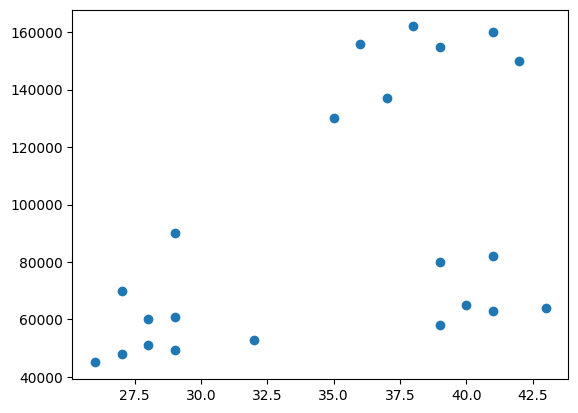

In [19]:
plt.scatter(df.Age,df["Income($)"])

#data preprocessing

In [20]:
scaler=MinMaxScaler()
scaler.fit(df[["Income($)"]])
df['Income($)']=scaler.transform(df[["Income($)"]])
scaler.fit(df[["Age"]])
df['Age']=scaler.transform(df[["Age"]])

In [21]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


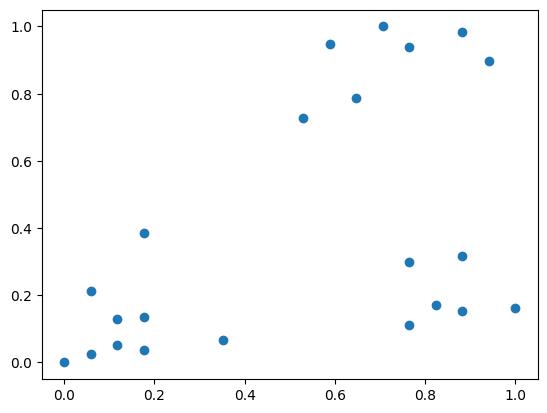

In [22]:
plt.scatter(df.Age,df["Income($)"])

In [23]:
K=KMeans(n_clusters=3)
y_predection=K.fit_predict(df[["Age","Income($)"]])
y_predection

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

In [24]:
df["clusters"]=y_predection
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [26]:
K.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [39]:
df1,df2,df3=df[df.clusters==0],df[df.clusters==1],df[df.clusters==2]
print(df1)
print(df2)
print(df3)

        Name       Age  Income($)  clusters
16    Dipika  0.823529   0.170940         0
17  Priyanka  0.882353   0.153846         0
18      Nick  1.000000   0.162393         0
19      Alia  0.764706   0.299145         0
20       Sid  0.882353   0.316239         0
21     Abdul  0.764706   0.111111         0
        Name       Age  Income($)  clusters
4       Kory  0.941176   0.897436         1
5     Gautam  0.764706   0.940171         1
6      David  0.882353   0.982906         1
7     Andrea  0.705882   1.000000         1
8       Brad  0.588235   0.948718         1
9   Angelina  0.529412   0.726496         1
10    Donald  0.647059   0.786325         1
       Name       Age  Income($)  clusters
0       Rob  0.058824   0.213675         2
1   Michael  0.176471   0.384615         2
2     Mohan  0.176471   0.136752         2
3    Ismail  0.117647   0.128205         2
11      Tom  0.000000   0.000000         2
12   Arnold  0.058824   0.025641         2
13    Jared  0.117647   0.051282       

In [44]:
K.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [45]:
K.cluster_centers_[:,0]

array([0.85294118, 0.72268908, 0.1372549 ])

In [46]:
K.cluster_centers_[:,1]

array([0.2022792 , 0.8974359 , 0.11633428])

In [50]:
K.inertia_

0.4750783498553096

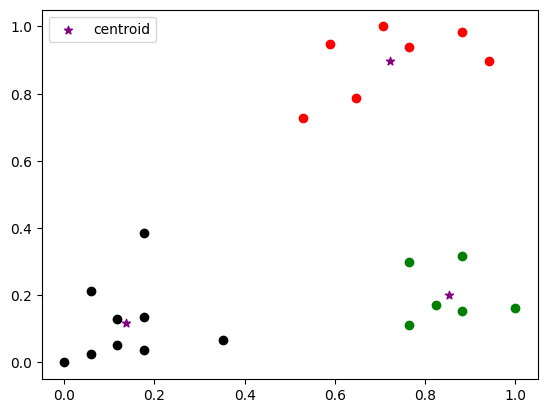

In [49]:
plt.scatter(df1.Age, df1["Income($)"], color="green")
plt.scatter(df2.Age, df2["Income($)"], color="red")
plt.scatter(df3.Age, df3["Income($)"], color="blue")

plt.scatter(K.cluster_centers_[:,0],K.cluster_centers_[:,1],color="black", marker="*", label="centroid")
plt.legend()



In [53]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    


Text(0, 0.5, 'SSE')

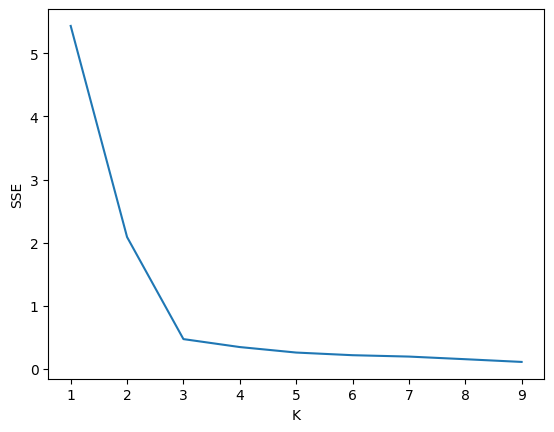

In [54]:
plt.plot(k_rng,sse)
plt.xlabel("K")
plt.ylabel("SSE")

